In [2]:
import pandas as pd

# Load csv and save as dataframe
rawdata = pd.read_csv (r'C:\Users\student\Downloads\StudentsPerformance_3.csv')
df = pd.DataFrame(rawdata)

# print last records in data frame
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


The code reads in a CSV file containing student performance data, converts it to a Pandas dataframe, and assigns it to a variable called df. It then prints out the last 5 records of the dataframe using the tail() method.

In words, the code does the following:

1. Imports the Pandas library using the import statement.

2. Loads a CSV file containing student performance data using the read_csv function from the Pandas library.

3. Converts the data from the CSV file into a Pandas dataframe using the DataFrame() function.

4. Assigns the resulting dataframe to a variable called df.

5. Uses the tail() method to print out the last 5 records of the dataframe.

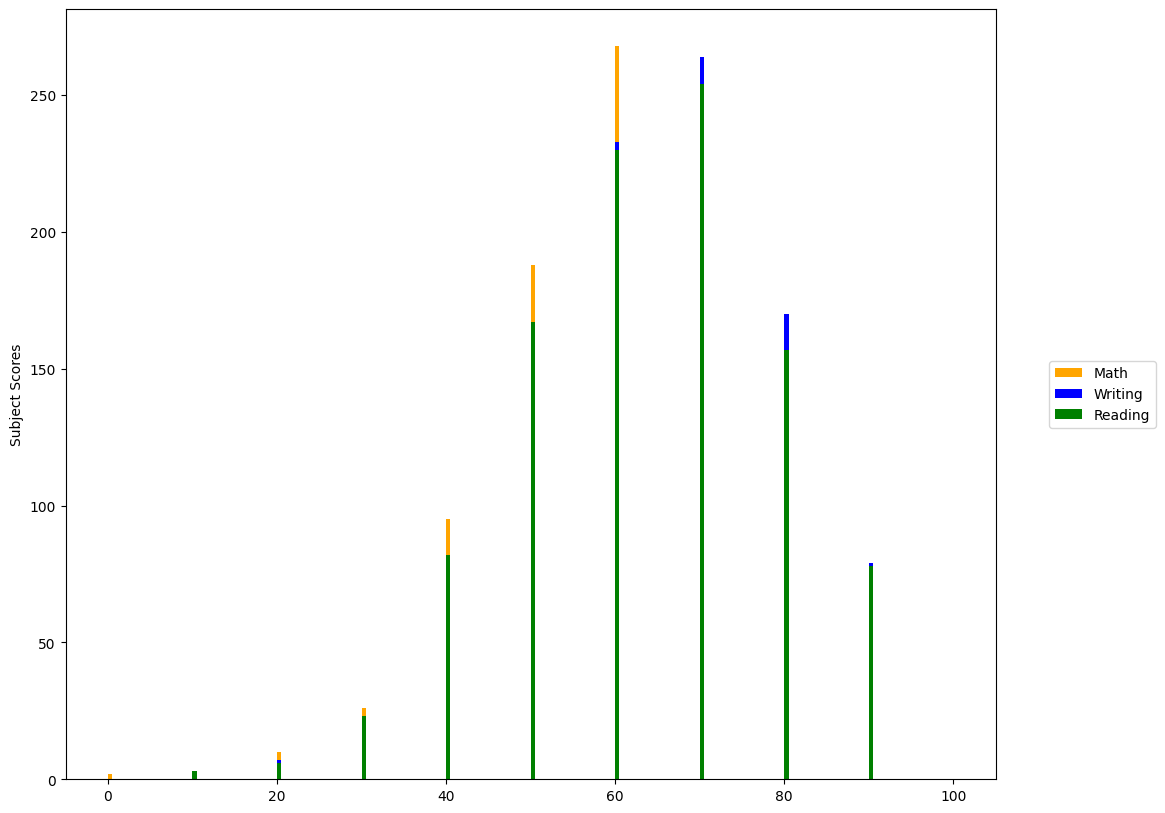

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from csv file and select desired columns
df = pd.read_csv (r'C:\Users\student\Downloads\StudentsPerformance_3.csv', usecols=['race/ethnicity', 'math score', 'writing score', 'reading score'])


# Create bar plot with custom colors and legend
colors = ['orange', 'blue', 'green']

# Calculate mean scores for each race/ethnicity
ax = df.plot(x="race/ethnicity", y=["math score","reading score","writing score"], kind='hist', width=0.5, figsize=(12, 10), color=colors)
ax.set_ylabel('Subject Scores')
ax.legend(labels=['Math', 'Writing', 'Reading'], bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.show()


1. The above code loads student performance data from a CSV file and selects specific columns for analysis. It creates a histogram bar chart of the mean scores for math, reading, and writing for each race/ethnicity. The chart shows the distribution of scores within each subject for all race/ethnicity groups, using different colors for each subject.

The code first loads the data from a CSV file, using the read_csv() function from the Pandas library. It then selects the columns "race/ethnicity", "math score", "writing score", and "reading score" using the usecols parameter of the read_csv() function.

The code then creates a bar chart using the plot() function from the Pandas library. The x parameter is set to "race/ethnicity" and the y parameter is set to a list of the three subject scores. The kind parameter is set to "hist" to create a histogram chart. The width parameter sets the width of each bar to 0.5, and the figsize parameter sets the size of the chart to 12 by 10 inches.

The set_ylabel() method is then used to set the y-axis label as "Subject Scores". The legend() method is used to add a legend to the chart. The labels parameter sets the labels for each subject, and the bbox_to_anchor parameter sets the location of the legend to the right of the chart.

Finally, the show() function from the matplotlib.pyplot module is used to display the chart on the screen.

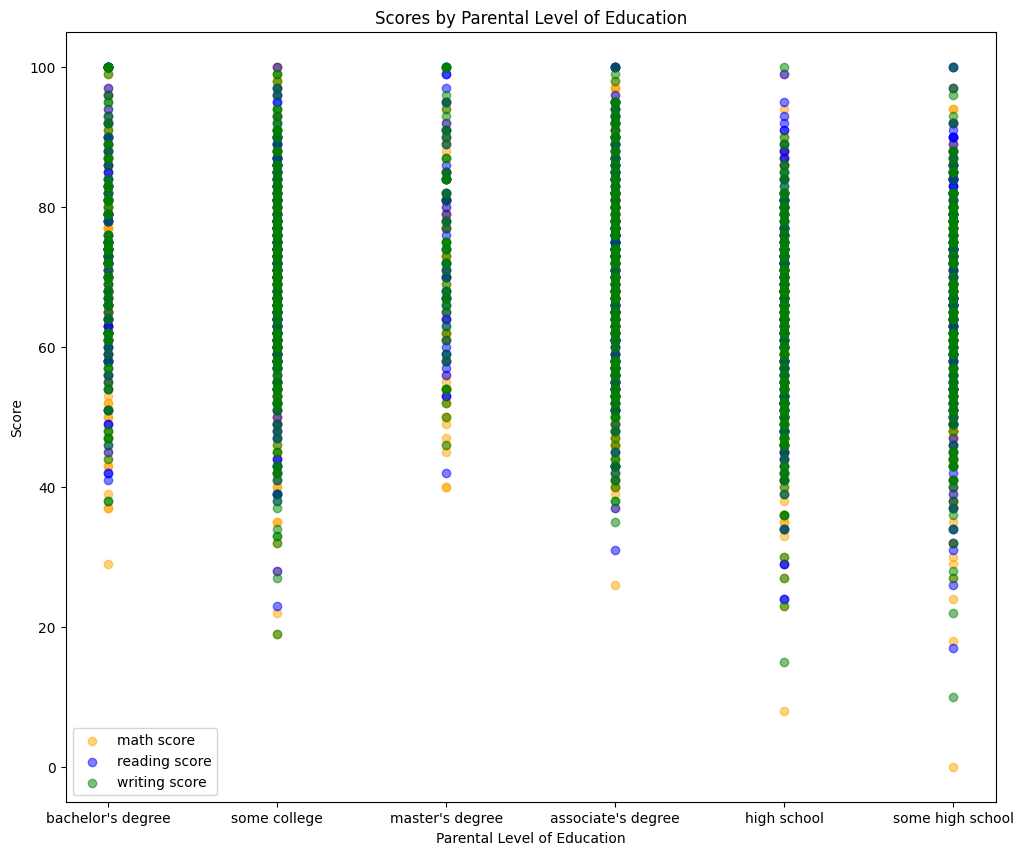

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from csv file and select desired columns
df = pd.read_csv(r'C:\Users\student\Downloads\StudentsPerformance_3.csv', usecols=['parental level of education', 'math score', 'writing score', 'reading score'])

# Create scatter plot
fig, ax = plt.subplots(figsize=(12, 10))
colors = ['orange', 'blue', 'green']
for i, subject in enumerate(['math score', 'reading score', 'writing score']):
    ax.scatter(df['parental level of education'], df[subject], color=colors[i], label=subject, alpha=0.5)

# Set axis labels and legend
ax.set_xlabel('Parental Level of Education')
ax.set_ylabel('Score')
ax.set_title('Scores by Parental Level of Education')
ax.legend()

plt.show()


2. The above code loads student performance data from a CSV file and selects specific columns for analysis. It creates a scatter plot of the scores for math, reading, and writing for each level of parental education. The chart shows the distribution of scores within each subject for all parental education levels, using different colors for each subject.

The code first loads the data from a CSV file using the read_csv() function from the Pandas library. It then selects the columns "parental level of education", "math score", "writing score", and "reading score" using the usecols parameter of the read_csv() function.

The code then creates a scatter plot using the scatter() function from the matplotlib.pyplot module. The x parameter is set to "parental level of education", and the y parameter is set to the score for each subject. The color parameter is set to a list of colors for each subject. The label parameter is set to the name of each subject, and the alpha parameter is set to 0.5 to make the plot slightly transparent.

The set_xlabel(), set_ylabel(), and set_title() methods are then used to set the x-axis label as "Parental Level of Education", the y-axis label as "Score", and the chart title as "Scores by Parental Level of Education". The legend() method is used to add a legend to the chart, which displays the name of each subject.

Finally, the show() function from the matplotlib.pyplot module is used to display the chart on the screen.

In [3]:
import pandas as pd
import pyodbc

# Connect to the SQL Server database
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=EC2AMAZ-MSOSK73;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')

# Define the SQL query to create the new table
create_query = '''
CREATE TABLE Filteddata
(
    Gender VARCHAR(10),
    Race VARCHAR(10),
    TestPreparation VARCHAR(10),
    MathScores INT,
    ReadingScores INT,
    WritingScores INT
);
'''

# Execute the query to create the new table
cursor = conn.cursor()
cursor.execute(create_query)
conn.commit()

# Read the data from the CSV file
df = pd.read_csv(r'C:\Users\student\Downloads\StudentsPerformance_3.csv')

# Filter the data to include only the scores of females in group A of race/ethnicity who had a test preparation course='completed'
filtered_df = df.loc[(df['gender'] == 'female') & (df['race/ethnicity'] == 'group A') & (df['test preparation course'] == 'completed')]

# Create a list of tuples containing the data to be inserted into the SQL Server table
data = list(zip(filtered_df['gender'], filtered_df['race/ethnicity'], filtered_df['test preparation course'], filtered_df['math score'], filtered_df['reading score'], filtered_df['writing score']))

# Define the SQL query to insert the data into the new table
insert_query = '''
INSERT INTO Filteddata (Gender, Race, TestPreparation, MathScores, ReadingScores, WritingScores)
VALUES (?, ?, ?, ?, ?, ?)
'''

# Execute the query to insert the data into the new table
cursor.executemany(insert_query, data)
conn.commit()



# Close the connection to the SQL Server database
conn.close()

This code connects to a SQL Server database using Python and the pyodbc library. It creates a new table in the database and inserts data into it.

First, a connection to the database is established using a connection string that specifies the server name, database name, and authentication credentials.

Next, an SQL query is defined to create a new table in the database. This query is executed using a cursor object, and the changes are committed to the database using the commit method.

Data is then read from a CSV file using the pandas library. The data is filtered to include only the scores of female students in group A of race/ethnicity who had completed a test preparation course.

A list of tuples is created containing the filtered data to be inserted into the new table. An SQL query is defined to insert this data into the new table, and this query is executed using the executemany method of the cursor object. Again, the changes are committed to the database using the commit method.

Finally, the connection to the SQL Server database is closed using the close method of the connection object.